#Regresión Logística

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix
import matplotlib.pyplot as plt

#import warnings
#warnings.simplefilter("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('/content/drive/MyDrive/IA in geo/data.csv',index_col=0)
le=LabelEncoder()
data["cover"]=le.fit_transform(data["cover"])
data=data.sample(n = 380000)

In [4]:
X=data.drop(['class'],axis=1)
y=data['class']
print(X.shape)
print(y.shape)

(380000, 9)
(380000,)


In [5]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(sampling_strategy=0.5)
X,y=rus.fit_resample(X,y)
X

,cover,slope,ev,pre,rad,soilH,2mT,skinT,soilT
0,5,1202.09990,-0.001102,0.002572,4759859.5,0.476934,298.69962,299.05550,299.41348
1,1,1197.54170,-0.001335,0.001500,5193613.0,0.481292,299.27360,300.46613,301.27243
2,1,514.78937,-0.000943,0.000000,6648586.5,0.198817,302.87167,304.15420,304.82358
3,5,822.54675,-0.001560,0.002624,4790023.0,0.487092,298.90118,298.79874,299.15524
4,5,1011.97516,-0.001392,0.002798,4761593.5,0.489946,300.64840,301.16080,301.95264
...,...,...,...,...,...,...,...,...,...
2290,1,1258.11790,-0.000732,0.000126,5921260.0,0.206054,304.17462,306.03604,306.59060
2291,1,945.56323,-0.001044,0.000316,5124314.5,0.295947,301.46110,302.17242,302.68620
2292,1,403.89352,-0.001133,0.001317,4371301.0,0.371732,299.99450,300.85153,301.52158
2293,5,575.82340,-0.001637,0.000000,6780367.5,0.209884,303.18228,303.78598,304.79477


## Statsmodels

In [6]:
import statsmodels.api as sm
model1=sm.Logit(y,X)
result1=model1.fit(method="nm")
print(result1.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                 2295
Model:                          Logit   Df Residuals:                     2286
Method:                           MLE   Df Model:                            8
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                 0.03488
Time:                        00:12:02   Log-Likelihood:                -1409.8
converged:                      False   LL-Null:                       -1460.8
Covariance Type:            nonrobust   LLR p-value:                 1.741e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cover          0.0002      0.023      0.008      0.993      -0.045       0.045
slope         -0.0006   8.68e-05     -7.354      0.000      -0.001      -0.000
ev             0.0003    298.310   1.14e-06      1.0

In [7]:
result1.params

cover    1.916608e-04
slope   -6.383591e-04
ev       3.410992e-04
pre      1.685906e-04
rad      6.544729e-09
soilH    1.816813e-05
2mT     -1.353077e-05
skinT   -1.751770e-05
soilT    4.090690e-05
dtype: float64

In [8]:
result1=model1.fit(method='bfgs')
print(result1.summary())

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                 2295
Model:                          Logit   Df Residuals:                     2286
Method:                           MLE   Df Model:                            8
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                -0.08897
Time:                        00:12:02   Log-Likelihood:                -1590.8
converged:                      False   LL-Null:                       -1460.8
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cover               0      0.022          0      1.000      -0.044       0.044

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
result1=model1.fit(maxiter=50)
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.359796
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                 2295
Model:                          Logit   Df Residuals:                     2286
Method:                           MLE   Df Model:                            8
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.4347
Time:                        00:12:02   Log-Likelihood:                -825.73
converged:                       True   LL-Null:                       -1460.8
Covariance Type:            nonrobust   LLR p-value:                6.702e-269
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cover         -0.3104      0.034     -9.068      0.000      -0.378      -0.243
slope         -0.0009      0

## Sklearn

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression( C=1e30,penalty='l1',fit_intercept=False,solver='liblinear')

In [11]:
model2=model.fit(X,y)
model2.coef_

array([[-3.23658304e-01, -9.35065334e-04, -1.94044147e+03,
        -9.11334596e+01, -3.85766127e-07, -1.64194264e+01,
         6.42834629e-03,  5.40336614e-03,  9.63832821e-03]])

In [12]:
model2.intercept_

0.0

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

A continuación se evaluán algunas de las métricas ya estudiadas en otros talleres.

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
Score_train=accuracy_score(y_train,model2.predict(X_train))
print('Precision en entrenamiento:',Score_train)
Score_test=accuracy_score(y_test,model2.predict(X_test))
print('Precision en validacion:',Score_test)
print(classification_report(y_test,model2.predict(X_test)))

Precision en entrenamiento: 0.8371459694989106
Precision en validacion: 0.8257080610021786
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       302
           1       0.75      0.75      0.75       157

    accuracy                           0.83       459
   macro avg       0.81      0.81      0.81       459
weighted avg       0.83      0.83      0.83       459



El método de RL puede arrojar valores categóricos en la predicción, en este caso 0 y 1, o probabilidades para cada caso, de la siguiente forma.

In [15]:
y_pred = model2.predict(X_test)
probabilities = model2.predict_proba(X_test)[:, 1]
y_pred,probabilities

(array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 

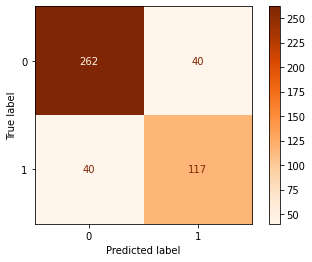

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Oranges")

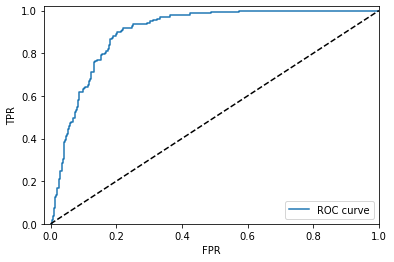

In [17]:
from sklearn.metrics import roc_curve
probs=model.predict_proba(X_test)
y_pred_proba = probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

El método de partición *cross validation* se puede utilizar de la siguiente manera:

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)
results = cross_val_score(model, X, y, cv=kfold)
print('Valor medio:',results.mean())
print('Desviacion estandar:',results.std())

Valor medio: 0.7751633986928104
Desviacion estandar: 0.11534420088081454


El MLE es Maximum Likelihood Estimation que estima la máxima probabilidad y asume a *joint probablity mass function*, mientras el OLS es un método que aproxima minimizando las distancias y no requiere ninguna hipótesis estocástica.

In [19]:
probability = model.predict_proba(X_test)[:, 1]
log_odds = model.decision_function(X_test)
classes = model.predict(X_test)

In [20]:
odds_ratio = np.exp(log_odds)
probability_manual = odds_ratio / (1 + odds_ratio)

# Para chequear si ambos son iguales
np.allclose(probability, probability_manual)

True

In [21]:
probability_manual = 1 / (1 + np.exp(-log_odds))

# Para chequear si ambos son iguales
np.allclose(probability, probability_manual)

True

A continuación se grafican las relaciones entre estos valores obtenidos.

(0.0, 1.0)

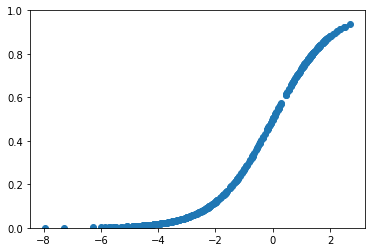

In [22]:
import matplotlib.pyplot as plt
plt.scatter(log_odds, probability)
plt.ylim(0,1)

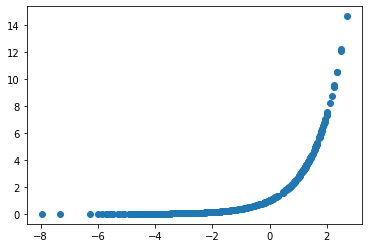

In [23]:
plt.scatter(log_odds, odds_ratio);

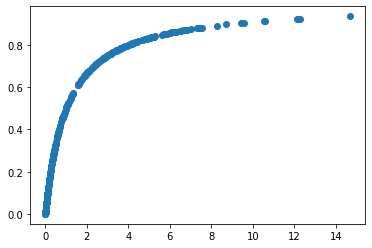

In [24]:
plt.scatter(odds_ratio,probability);

Finalmente, y para este caso de pocos valores, se puede observar los resultados de la siguiente forma.

In [25]:
df = pd.DataFrame(dict(probability=probability, log_odds=log_odds, classes=classes))
df.sort_values('probability')

,probability,log_odds,classes
133,0.000355,-7.942259,0
196,0.000672,-7.304402,0
419,0.001856,-6.287215,0
93,0.002504,-5.987532,0
213,0.002899,-5.840478,0
...,...,...,...
321,0.913399,2.355862,1
268,0.913514,2.357311,1
233,0.923725,2.494073,1
381,0.924590,2.506407,1
